In [1]:
%load_ext autoreload
%autoreload 2

import os

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
# print(physical_devices)
assert len(physical_devices) == 1, "Did not see the expected number of GPUs"
# to allow other tensorflow processes to use the gpu
# https://stackoverflow.com/a/60699372/7989988
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import numpy as np
from tensorflow import keras
from tensorflow.keras import Model, Input, layers
from IPython.display import display
import tensorflow_datasets as tfds
import time
import matplotlib.pyplot as plt
import enlighten
import tensorflow_probability as tfp
# from dotmap import DotMap
from box import Box as DotMap

2022-05-12 11:55:51.621964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 11:55:51.647801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 11:55:51.647996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
import models
import training
import datasets
import vizualization
import schedules
import create_dataset

2022-05-12 11:55:52.708433: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-12 11:55:52.709195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 11:55:52.709385: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 11:55:52.709530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
202

In [3]:

test_data = create_dataset.np_dataset()
test_data.shape

(127, 4)

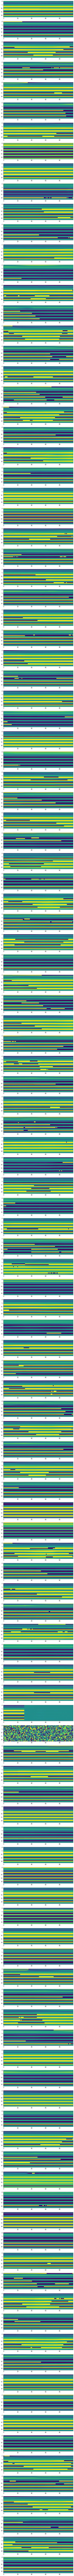

In [4]:
fig, ax = plt.subplots(len(test_data), 1, figsize=(10, 3*len(test_data)))
for i, (filename, n_frames, data, is_right_hand) in enumerate(test_data):
    ax[i].imshow(tf.transpose(data[:100]))
fig.savefig("img_100frames_all.png")
plt.show()